# GDP Growth Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Read Data

In [2]:
# Data on GDP growth
df_gdp = pd.read_excel(
    "./../../assets/GDP-growth.xlsx",
    sheet_name="Quarterly real GDP growth",
    header=5,
    skipfooter=5
)
df_gdp.set_index('Period', inplace=True, drop=True)
df_gdp.drop(columns=['Unnamed: 1', 'Unnamed: 2'], inplace=True)

In [3]:
# rename columns
for i in range(int(len(df_gdp.columns) / 2)):
    df_gdp.rename(
        columns={
            df_gdp.columns[2*i+1]: df_gdp.columns[2*i]
        },
        inplace=True
    )

In [4]:
df_gdp = df_gdp.T
df_gdp.drop(columns=['Country'], inplace=True)

In [5]:
# Coerce non-numeric values to NaN
df_gdp = df_gdp.apply(pd.to_numeric, errors='coerce')

In [6]:
# Delete rows that are all NaN
df_gdp.dropna(how='all', inplace=True)

In [7]:
df_gdp

Period,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,Estonia,...,Brazil,Bulgaria,China (People's Republic of),Croatia,India,Indonesia,Romania,Russia,Saudi Arabia,South Africa
Q2-1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q3-1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q4-1947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q1-1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Q2-1948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Q4-2022,0.854933,-0.109469,0.242596,-0.215348,0.134982,-1.636127,2.252222,-0.355478,0.129033,-1.436173,...,-0.116739,0.585075,0.6,0.283145,1.14099,2.336994,1.223659,NaN,1.164417,-1.094064
Q1-2023,0.533364,0.091308,0.413039,0.610026,0.546959,2.171743,-0.584824,0.113500,0.906018,-0.777569,...,1.439727,0.349776,2.1,0.881596,2.08053,0.837339,-0.804894,NaN,-1.116411,0.406619
Q2-2023,0.438743,-1.109172,0.332990,0.338964,-0.348738,-0.988247,2.504614,0.080160,-0.699459,-0.600577,...,0.984869,0.412767,0.6,1.490864,1.88750,0.866408,1.548405,NaN,-0.505205,0.457335
Q3-2023,0.211980,-0.518956,0.381116,-0.266630,0.331248,0.238780,1.286147,-0.631639,-0.652085,-1.293712,...,0.144535,0.396863,1.5,0.285880,1.73614,0.809230,0.887211,NaN,-3.176124,-0.247545


In [10]:
# Change the index to datetime
def parse_quarter_string(q_string):
    # Split the string into its components (e.g., "Q2-1947" -> ["Q2", "1947"])
    quarter_part, year_part = q_string.split('-')
    
    # Extract the quarter number
    quarter_number = int(quarter_part[1])  # Convert "2" to 2
    
    # Determine the month that corresponds to the quarter
    month = (quarter_number - 1) * 3 + 1  # Quarter 1 starts in January, Quarter 2 in April, etc.
    
    # Create a datetime object for the first day of the starting month of the quarter
    return pd.Timestamp(year=int(year_part), month=month, day=1)

# Apply the function to the index
df_gdp.index = df_gdp.index.map(parse_quarter_string)

In [11]:
df_gdp

Period,Australia,Austria,Belgium,Canada,Chile,Colombia,Costa Rica,Czechia,Denmark,Estonia,...,Brazil,Bulgaria,China (People's Republic of),Croatia,India,Indonesia,Romania,Russia,Saudi Arabia,South Africa
1947-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1947-10-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1948-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-01,0.854933,-0.109469,0.242596,-0.215348,0.134982,-1.636127,2.252222,-0.355478,0.129033,-1.436173,...,-0.116739,0.585075,0.6,0.283145,1.14099,2.336994,1.223659,NaN,1.164417,-1.094064
2023-01-01,0.533364,0.091308,0.413039,0.610026,0.546959,2.171743,-0.584824,0.113500,0.906018,-0.777569,...,1.439727,0.349776,2.1,0.881596,2.08053,0.837339,-0.804894,NaN,-1.116411,0.406619
2023-04-01,0.438743,-1.109172,0.332990,0.338964,-0.348738,-0.988247,2.504614,0.080160,-0.699459,-0.600577,...,0.984869,0.412767,0.6,1.490864,1.88750,0.866408,1.548405,NaN,-0.505205,0.457335
2023-07-01,0.211980,-0.518956,0.381116,-0.266630,0.331248,0.238780,1.286147,-0.631639,-0.652085,-1.293712,...,0.144535,0.396863,1.5,0.285880,1.73614,0.809230,0.887211,NaN,-3.176124,-0.247545


In [14]:
df_gdp.columns

Index(['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States',
       'European Union – 27 countries (from 01/02/2020)',
       'Euro area (20 countries)', 'G7', 'NAFTA', 'OECD - Europe', 'G20',
       'OECD - Total', 'Argentina', 'Brazil', 'Bulgaria',
       'China (People's Republic of)', 'Croatia', 'India', 'Indonesia',
       'Romania', 'Russia', 'Saudi Arabia', 'South Africa'],
      dtype='object', name='Period')

In [17]:
# Add median column
df_gdp['median'] = df_gdp.median(axis=1)

In [21]:
# Names of countries
countries = ['Australia', 'Austria', 'Belgium', 'Canada', 'Chile', 'Colombia',
       'Costa Rica', 'Czechia', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy',
       'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Slovenia', 'Spain', 'Sweden', 'Switzerland',
       'Türkiye', 'United Kingdom', 'United States', 'Argentina', 'Brazil', 'Bulgaria',
       "China (People's Republic of)", 'Croatia', 'India', 'Indonesia',
       'Romania', 'Russia', 'Saudi Arabia', 'South Africa']

In [22]:
# Count the number of countries for which there is data (not NaN for each quarter)
df_gdp['count'] = df_gdp[countries].count(axis=1)

<Axes: >

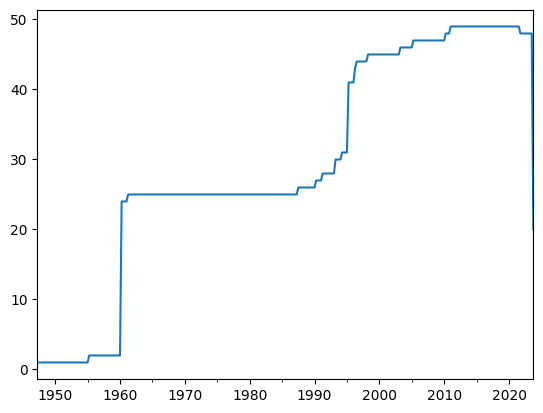

In [24]:
df_gdp['count'].plot()